In [1]:
#Read the dataset
import pandas as pd
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from  sklearn.metrics  import accuracy_score

In [7]:
folder = 'input/imdb/'
labels = {'pos': 1, 'neg': 0}
df = pd.DataFrame()
for f in ('test', 'train'):    
    for l in ('pos', 'neg'):
        path = os.path.join(folder, f, l)
        for file in os.listdir (path) :
            with open(os.path.join(path, file),'r', encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]],ignore_index=True)

df.columns = ['review', 'sentiment']

In [9]:
#save the file
df.to_csv("input/imdb.csv",index=False, encoding='utf-8')

In [3]:
df = pd.read_csv("input/imdb.csv")

In [4]:
df.head()

,review,sentiment
0,"Based on an actual story, John Boorman shows t...",1
1,This is a gem. As a Film Four production - the...,1
2,"I really like this show. It has drama, romance...",1
3,This is the best 3-D experience Disney has at ...,1
4,"Of the Korean movies I've seen, only three had...",1


In [6]:
df.shape

(50000, 2)

In [17]:
import string
def remove_punctuation(text):
    no_punc = "".join([char for char in text if char not in string.punctuation])
    return no_punc

In [18]:
df['review_no_punc'] = df['review'].apply(lambda x:remove_punctuation(x))

In [19]:
df.head()

,review,sentiment,review_no_punc
0,"Based on an actual story, John Boorman shows t...",1,Based on an actual story John Boorman shows th...
1,This is a gem. As a Film Four production - the...,1,This is a gem As a Film Four production the a...
2,"I really like this show. It has drama, romance...",1,I really like this show It has drama romance a...
3,This is the best 3-D experience Disney has at ...,1,This is the best 3D experience Disney has at t...
4,"Of the Korean movies I've seen, only three had...",1,Of the Korean movies Ive seen only three had r...


In [22]:
#Get frequency distributio of words

reviews = df.review_no_punc.str.cat(sep=' ')#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))

#Remove stop words
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

frequency_dist = nltk.FreqDist(tokens)
#sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

214138


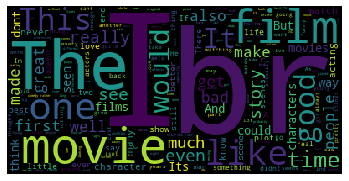

In [23]:
#Visualize
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review_no_punc'],df['sentiment'], test_size=0.2, random_state=42)

In [36]:
#Traim amd test datasets for the classifier
X_train = df.loc[:24999, 'review_no_punc'].values
y_train = df.loc[:24999, 'sentiment'].values
X_test = df.loc[25000:, 'review_no_punc'].values
y_test = df.loc[25000:, 'sentiment'].values

In [40]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [42]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(40000, 158678) (10000, 158678)


In [47]:
clf = MultinomialNB().fit(train_vectors, y_train)

In [48]:
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.8627
